In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as ply
from sklearn.model_selection import TimeSeriesSplit
from fbprophet import Prophet
%matplotlib inline

In [2]:
df_actual = pd.read_csv("../write_data/Charlotte.csv")
df_actual['time'] = pd.to_datetime(df_actual['time'])

In [3]:
df_fut = pd.read_csv("../write_data/Charlotte_future.csv")
df_fut['ds'] = pd.to_datetime(df_fut['ds'])

In [4]:
zippies = df_fut.Zip_code.unique()

In [5]:
all_zips = pd.read_csv("../write_data/zillow_housing_zipcodes.csv")
all_zips['Date_index'] = pd.to_datetime(all_zips['Date_index'])
all_zips = all_zips.set_index('Date_index')

In [6]:
zippies_strings = ["%.0f" % number for number in zippies]

In [7]:
metro_zips = all_zips.filter(items=zippies_strings)

In [8]:
actual_mean = metro_zips.mean(axis=1)

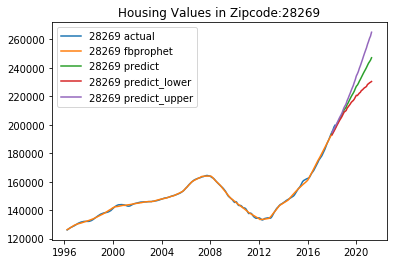

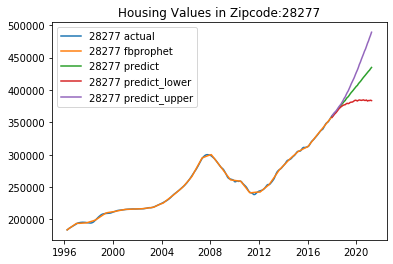

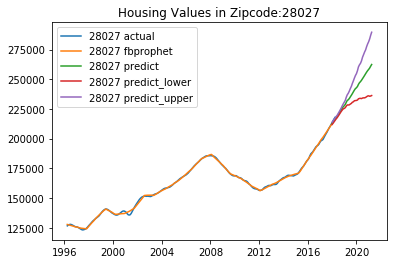

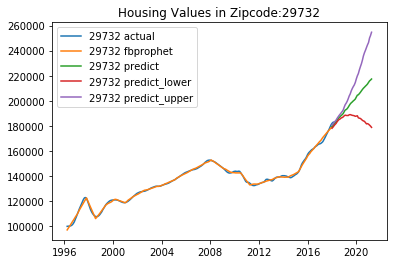

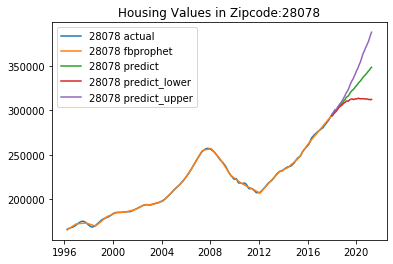

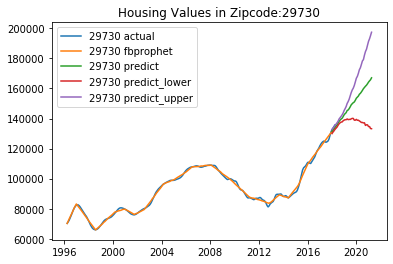

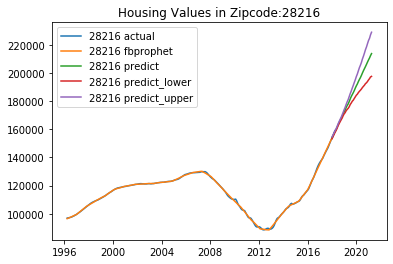

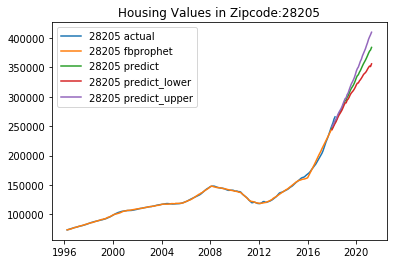

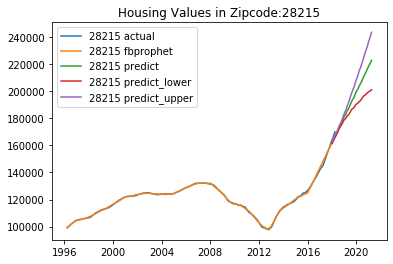

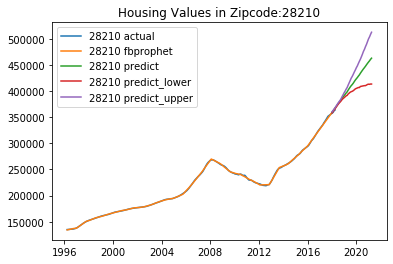

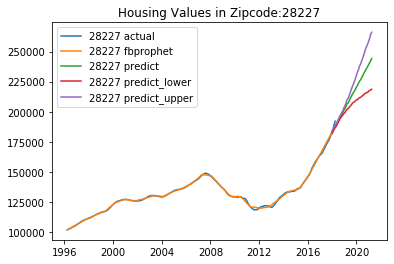

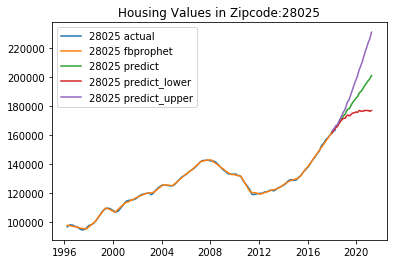

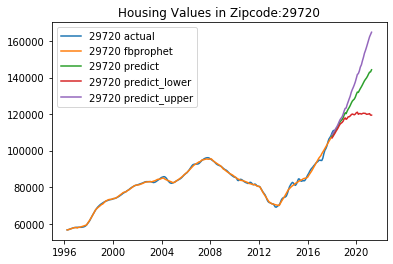

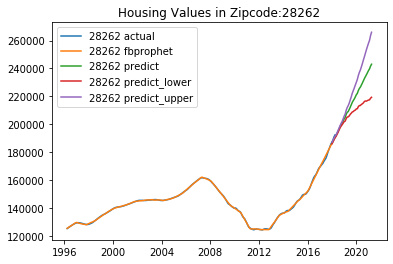

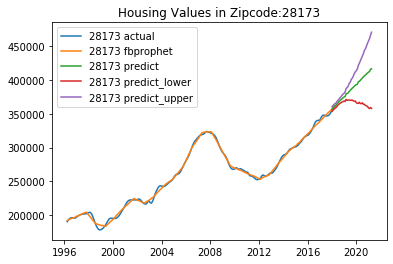

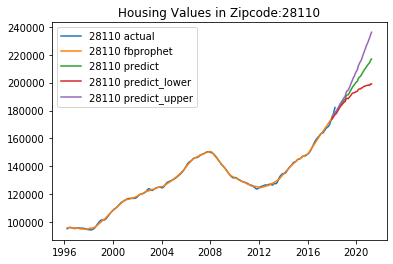

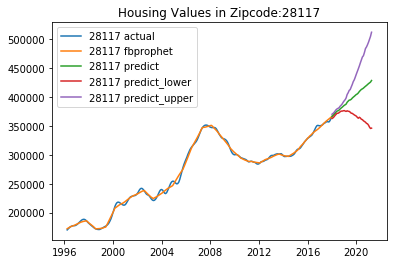

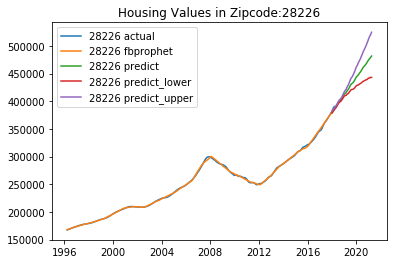

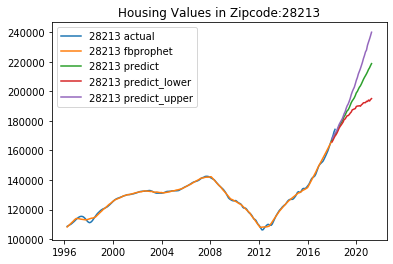

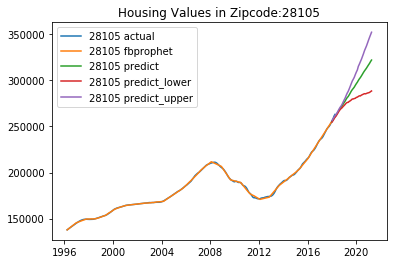

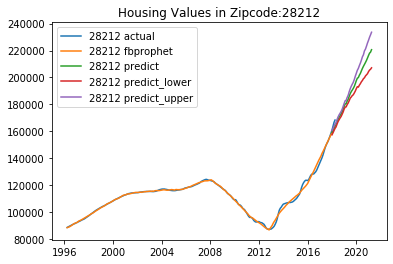

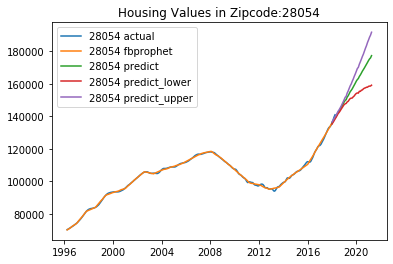

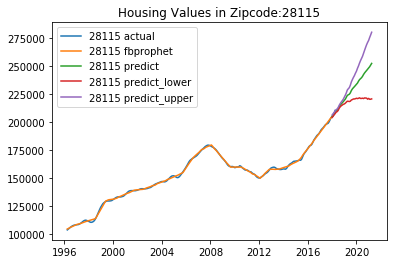

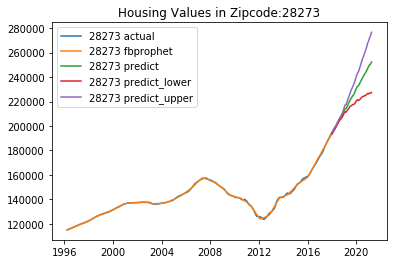

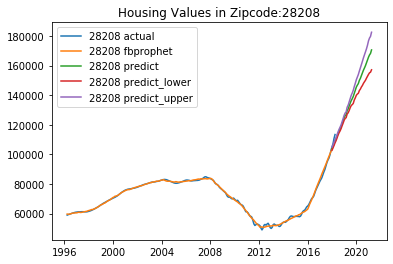

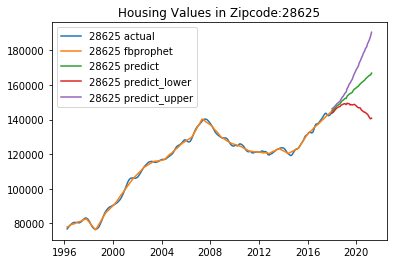

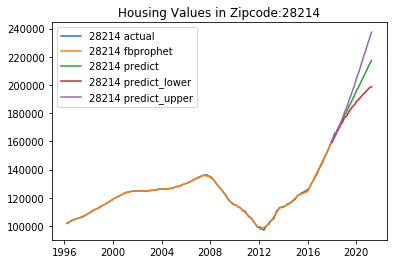

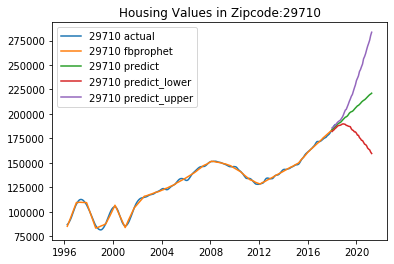

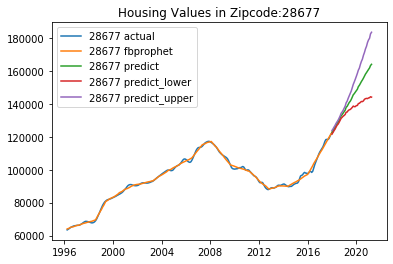

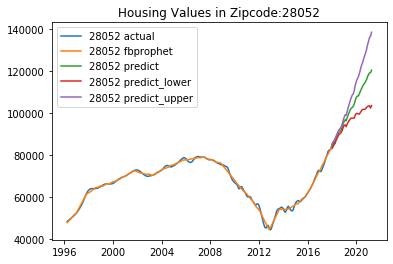

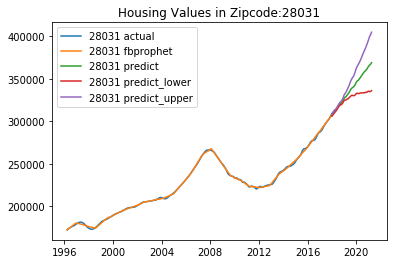

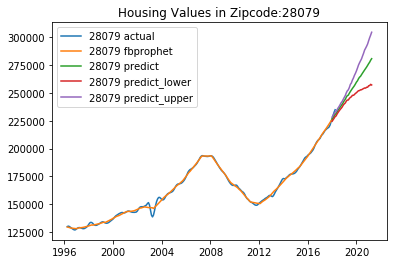

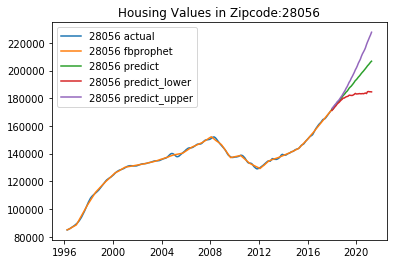

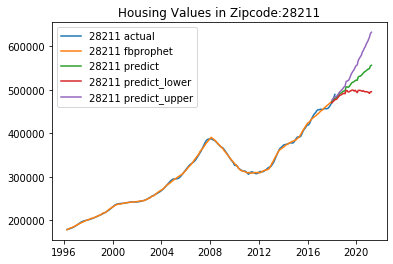

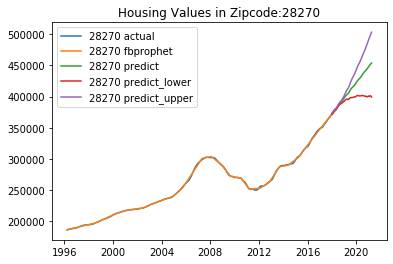

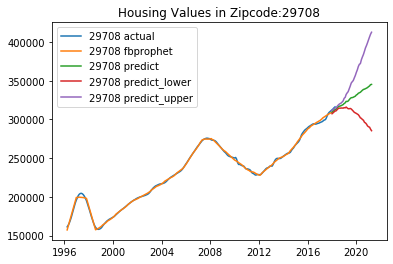

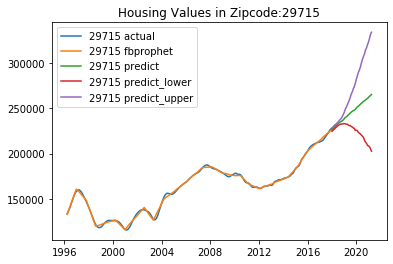

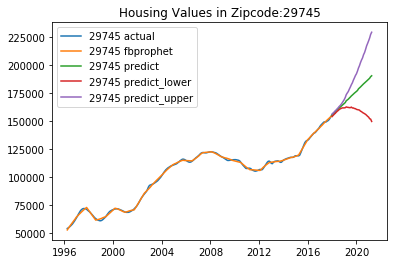

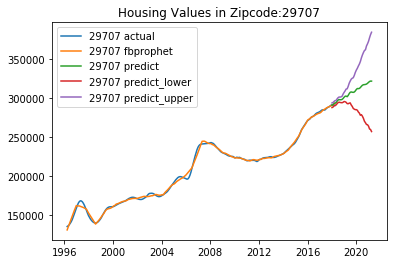

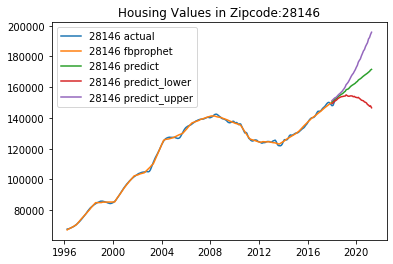

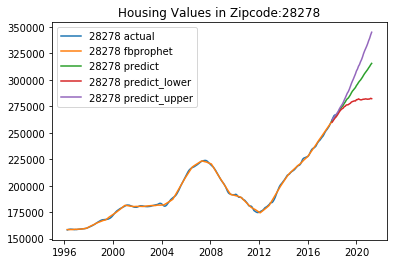

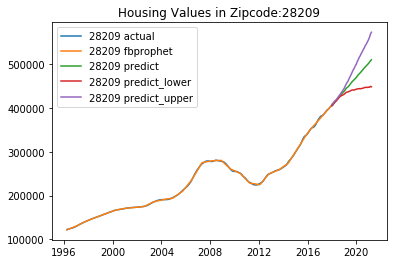

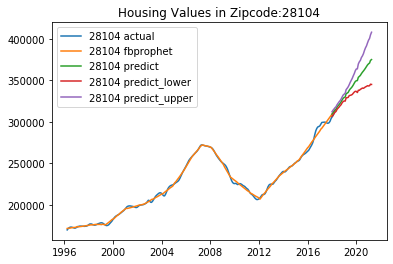

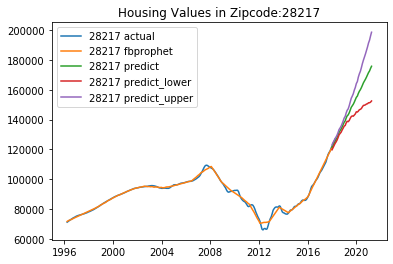

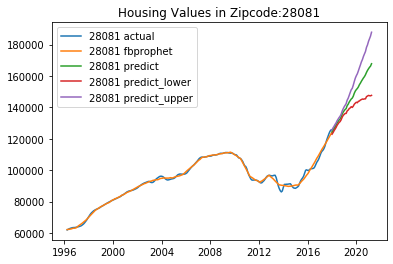

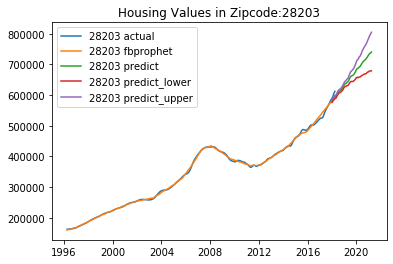

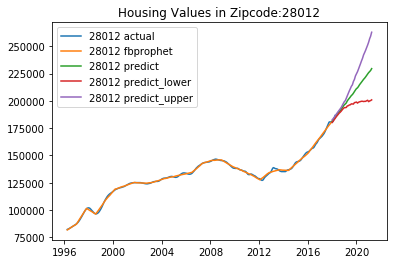

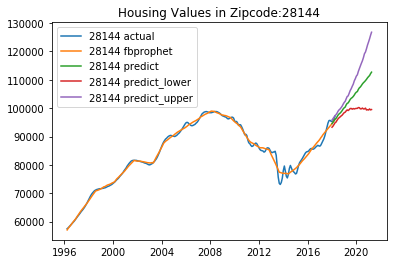

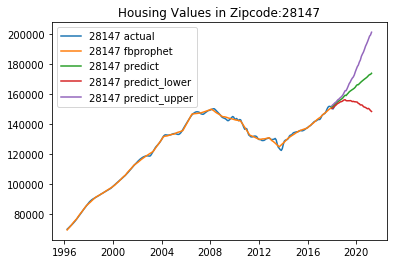

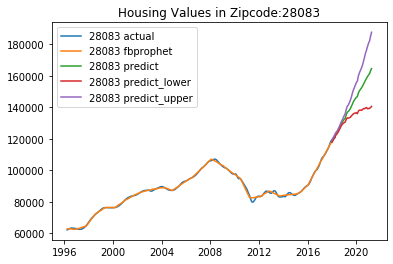

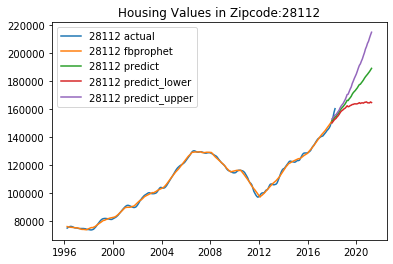

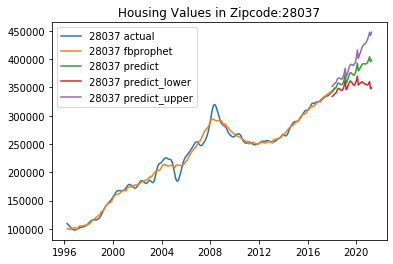

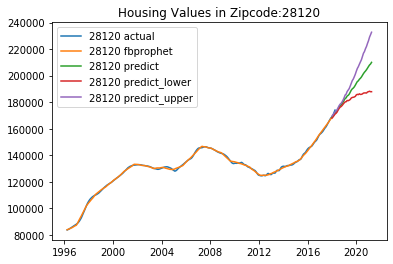

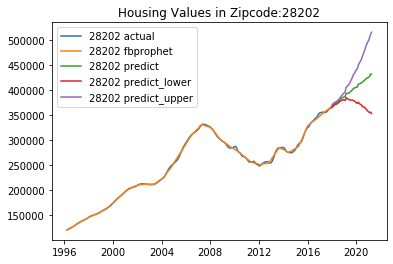

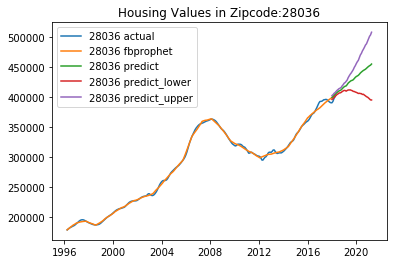

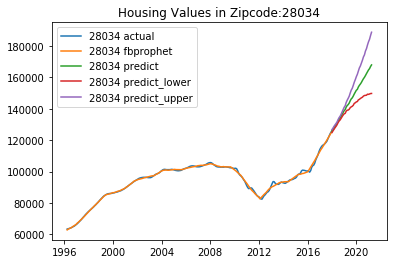

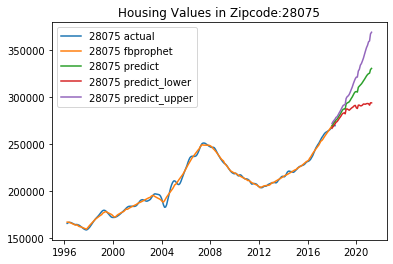

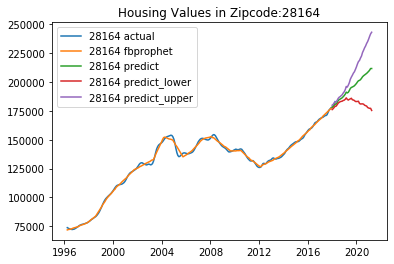

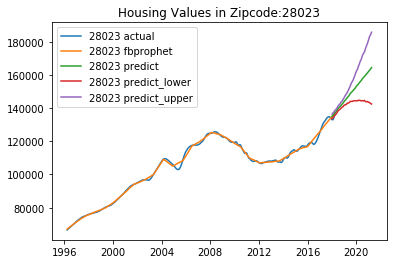

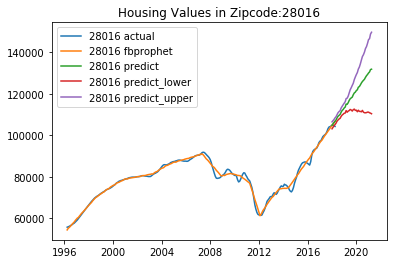

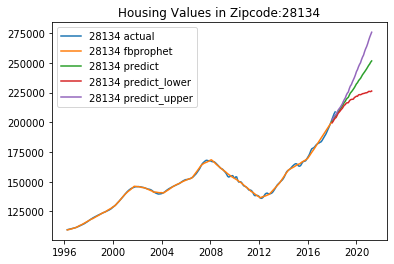

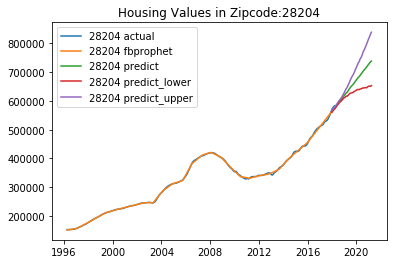

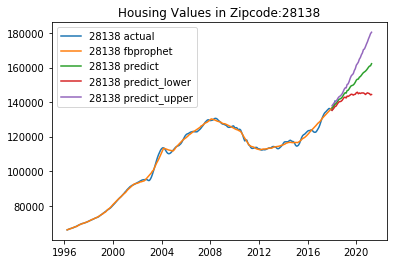

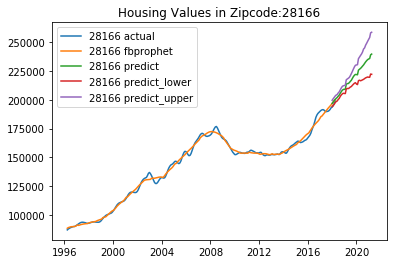

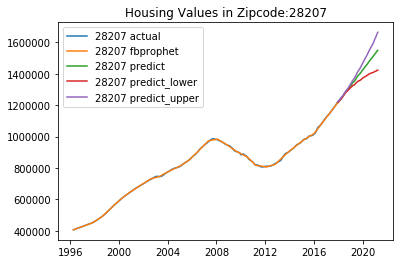

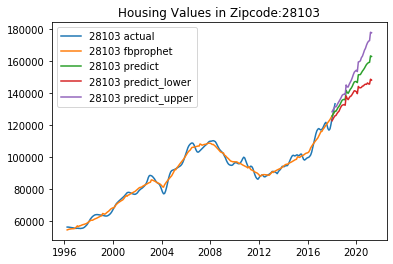

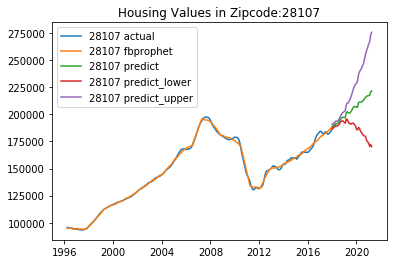

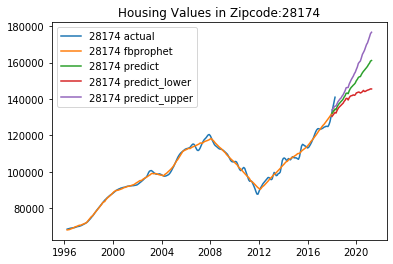

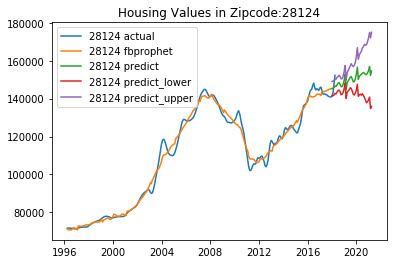

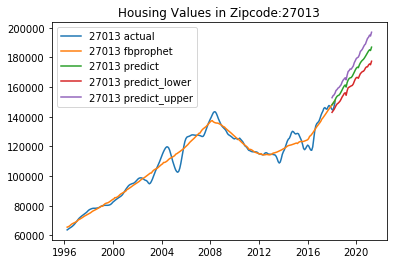

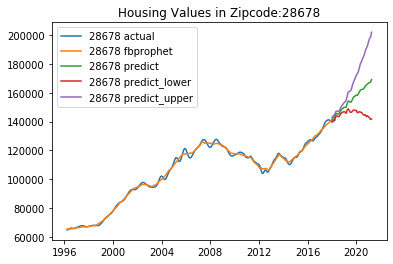

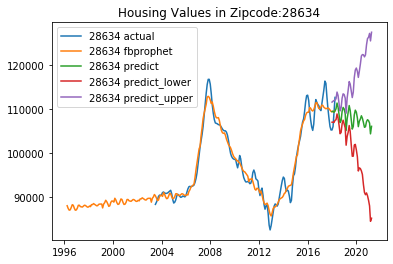

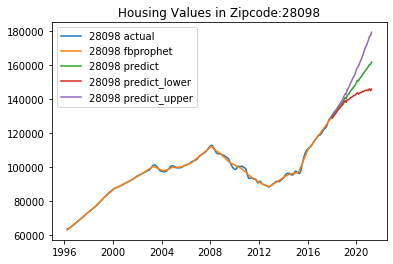

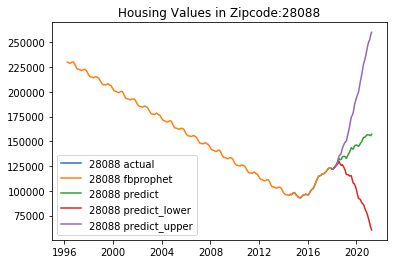

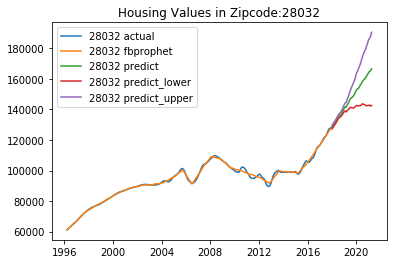

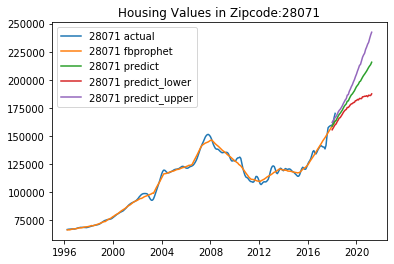

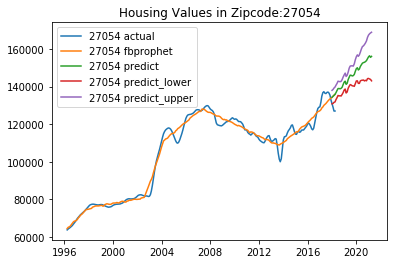

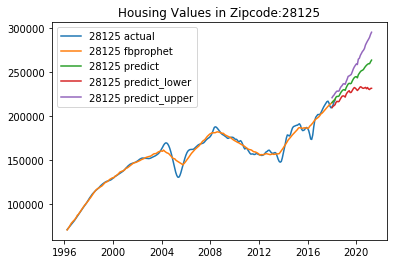

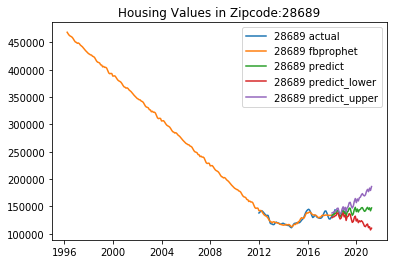

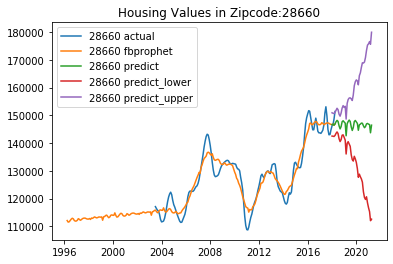

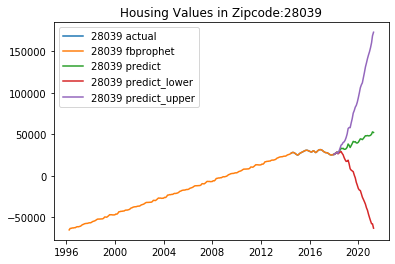

In [9]:
for zippy in zippies:
    
    plt.plot(df_actual[df_actual['Zip_code'] == zippy]['time'], 
             df_actual[df_actual['Zip_code'] == zippy]['value'], 
             label=f'{zippy} actual')

    plt.plot(df_actual[df_actual['Zip_code'] == zippy]['time'], 
             df_actual[df_actual['Zip_code'] == zippy]['yhat'], 
             label=f'{zippy} fbprophet')

    plt.plot(df_fut[df_fut['Zip_code'] == zippy]['ds'], 
             df_fut[df_fut['Zip_code'] == zippy]['yhat'], 
             label=f'{zippy} predict')

    plt.plot(df_fut[df_fut['Zip_code'] == zippy]['ds'], 
             df_fut[df_fut['Zip_code'] == zippy]['yhat_lower'], 
             label=f'{zippy} predict_lower')

    plt.plot(df_fut[df_fut['Zip_code'] == zippy]['ds'], 
             df_fut[df_fut['Zip_code'] == zippy]['yhat_upper'], 
             label=f'{zippy} predict_upper')
    
    plt.legend(loc='best')
    plt.title(f"Housing Values in Zipcode:{zippy}")
    
    plt.show()

In [10]:
metro_annual = metro_zips.resample("YS").mean()
metro_annual_pct = metro_annual.pct_change()
metro_annual_pct_diff = metro_annual.pct_change().diff()

In [11]:
metro_annual_pct.min().min(), metro_annual_pct.max().max()

(-0.19474259590538667, 0.2651812514430849)

In [24]:
metro_annual_pct.tail(3).T.sort_values('2018-01-01', ascending=False)

Date_index  2016-01-01  2017-01-01  2018-01-01
28208         0.200554    0.265181    0.194908
28205         0.122809    0.222587    0.173864
28212         0.101005    0.147482    0.116791
28071         0.124094    0.107201    0.116559
28217         0.134471    0.166536    0.113538
...                ...         ...         ...
28146         0.063184    0.048952    0.011681
28036         0.072238    0.053946    0.004676
28039         0.041120   -0.078151   -0.011851
28634         0.044414    0.012857   -0.024110
27054         0.043907    0.110769   -0.049029

[81 rows x 3 columns]

In [12]:
metro_annual_pct_diff.min().min(), metro_annual_pct_diff.max().max()

(-0.3341226548762498, 0.3175867170478085)

In [13]:
df_pred_wide = df_actual.pivot(index='time', columns='Zip_code',values='yhat')
df_fut_wide = df_fut.pivot(index='ds', columns='Zip_code',values='yhat')

In [14]:
fbproph = pd.concat([df_pred_wide.resample("YS").mean(), df_fut_wide.resample("YS").mean()], axis=0)
fb_pct_change = fbproph.pct_change()
fb_ann = fbproph.pct_change().diff()

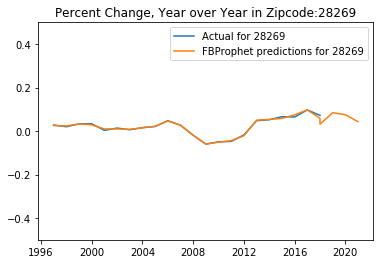

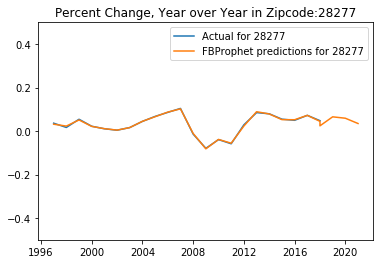

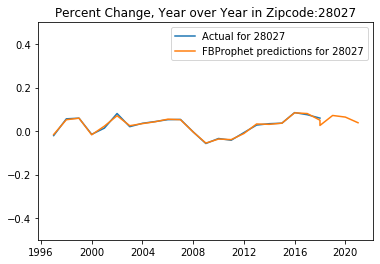

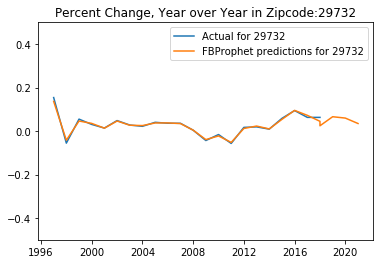

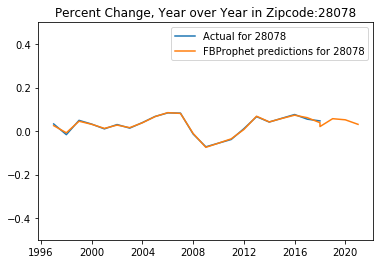

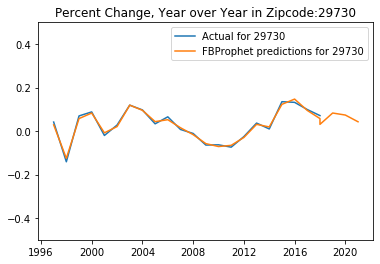

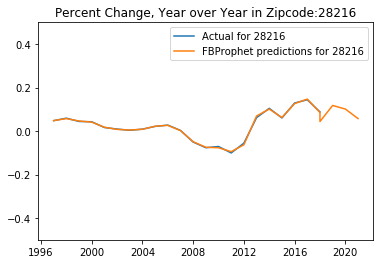

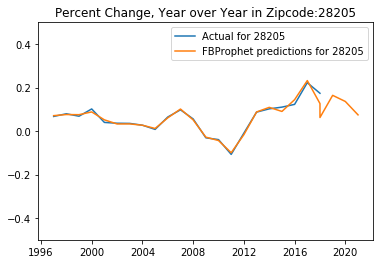

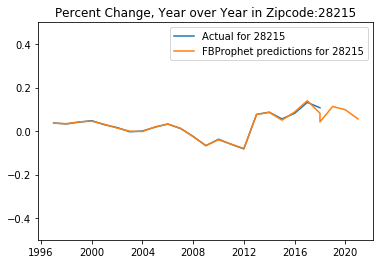

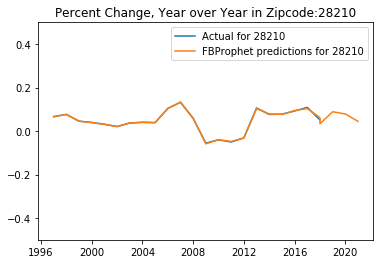

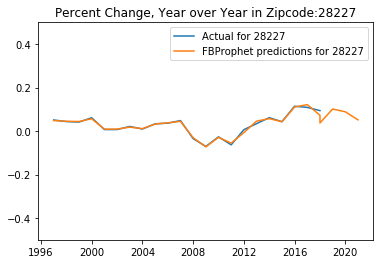

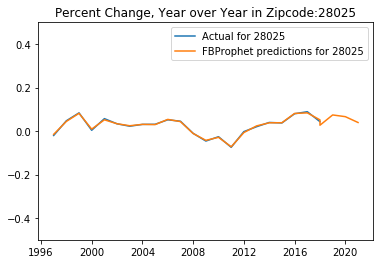

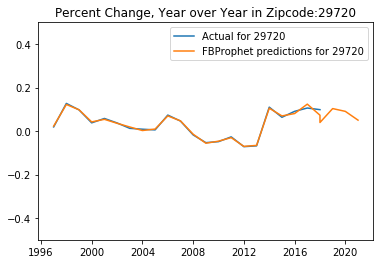

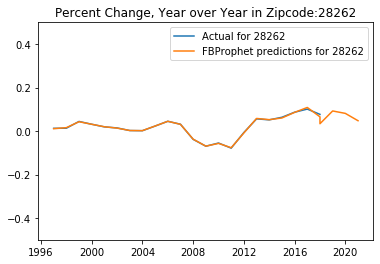

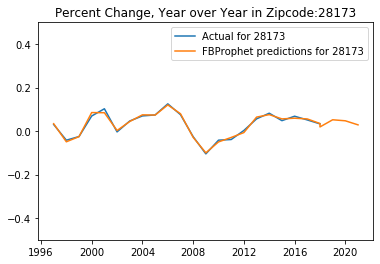

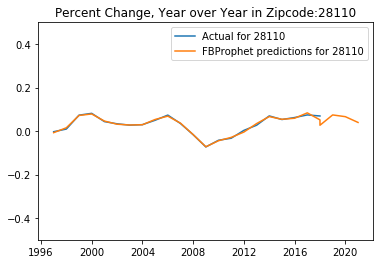

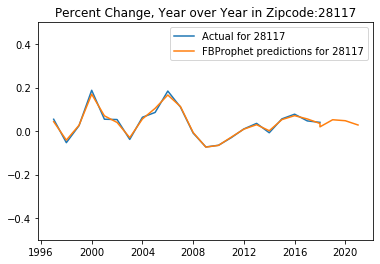

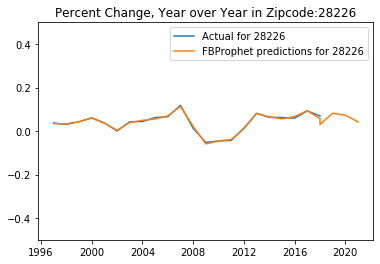

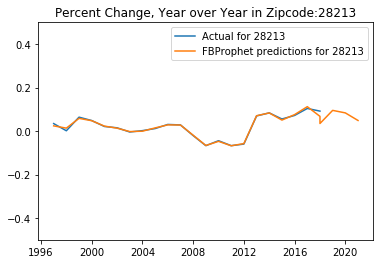

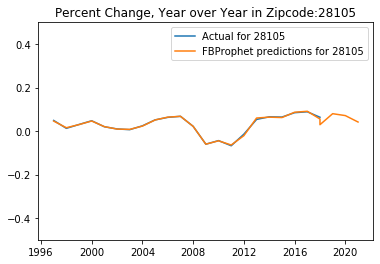

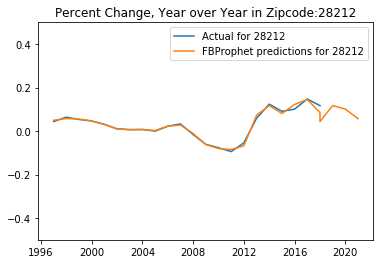

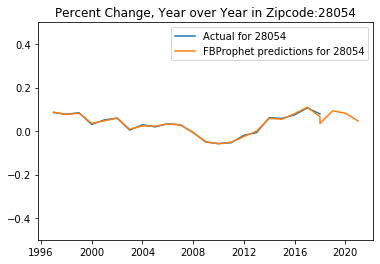

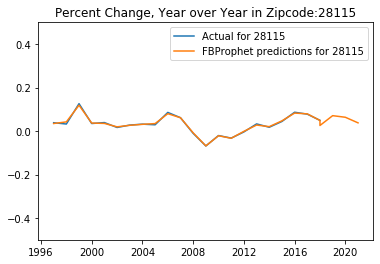

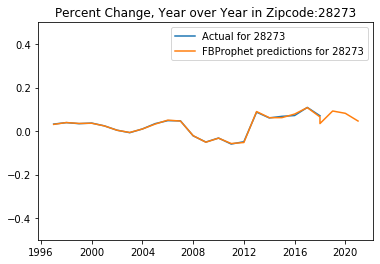

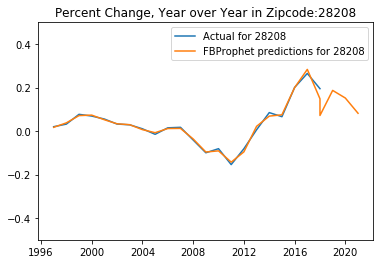

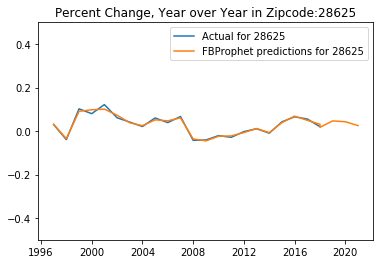

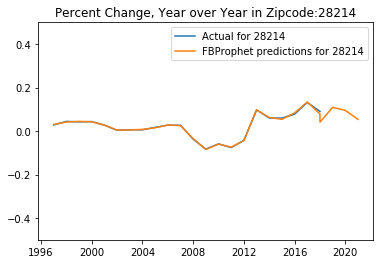

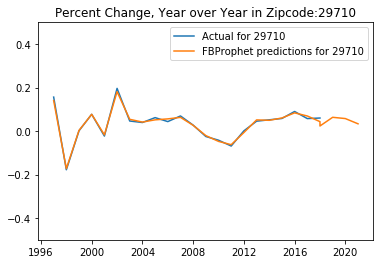

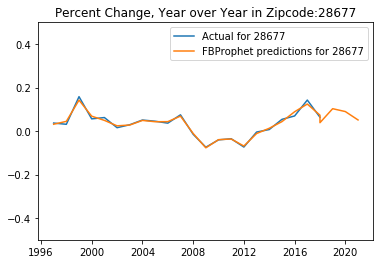

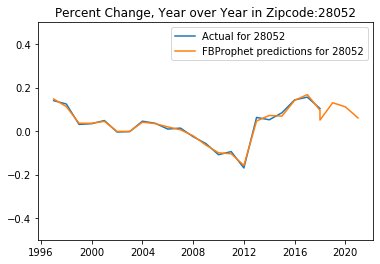

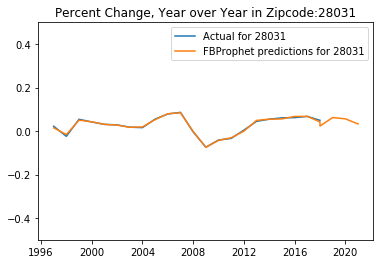

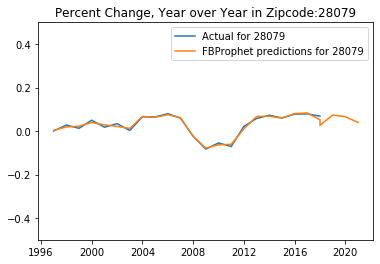

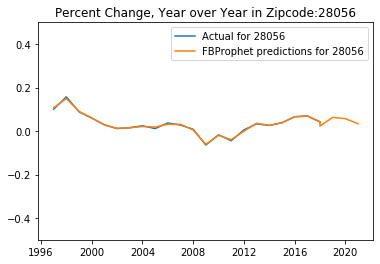

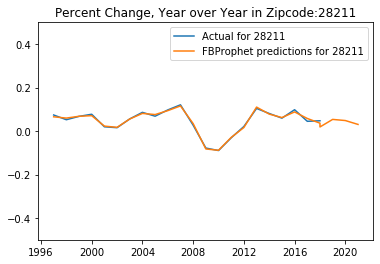

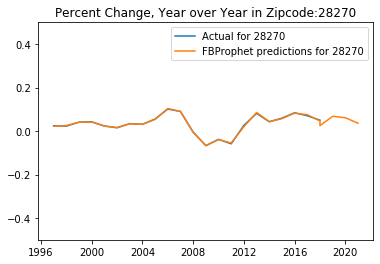

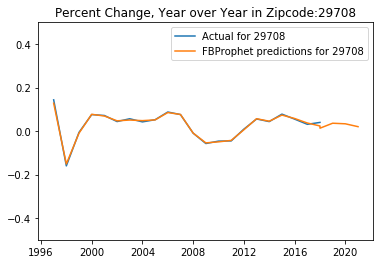

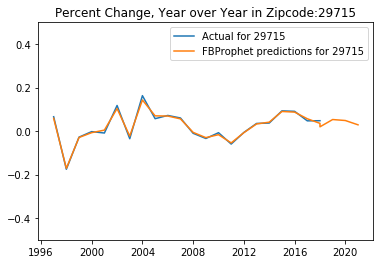

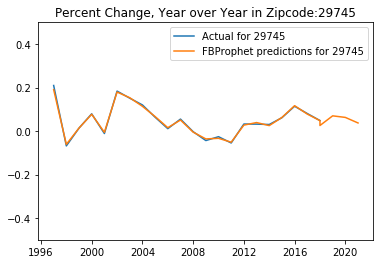

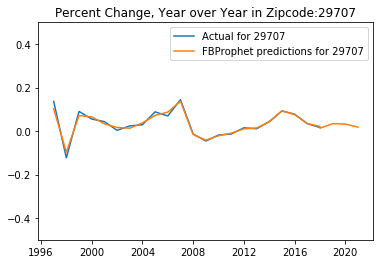

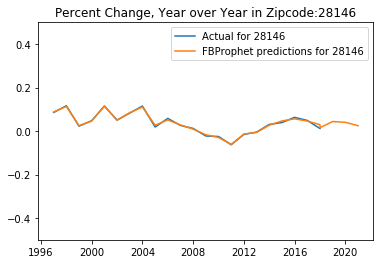

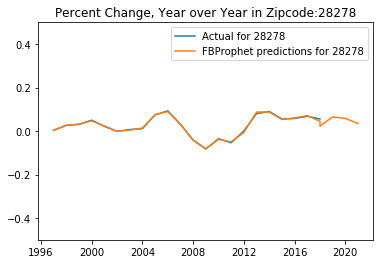

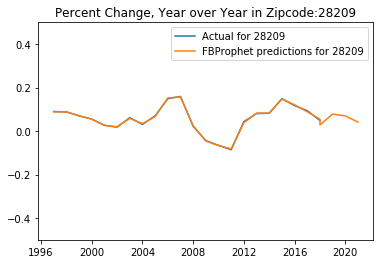

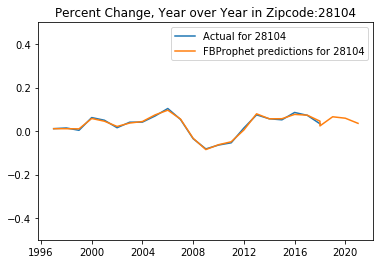

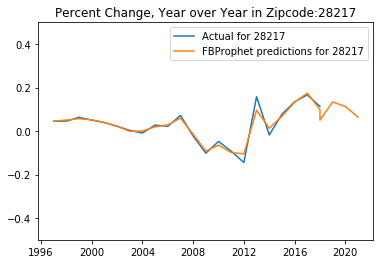

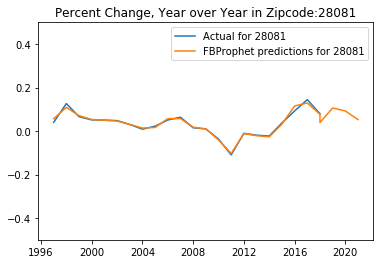

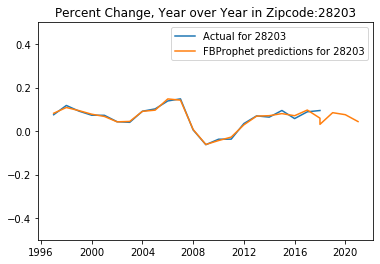

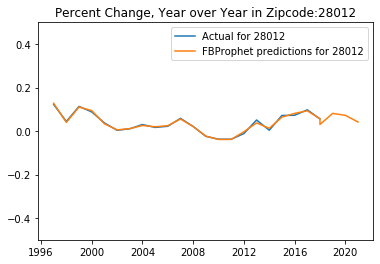

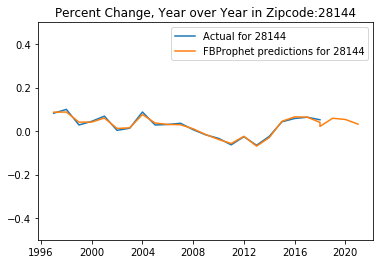

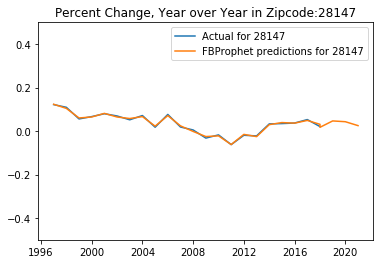

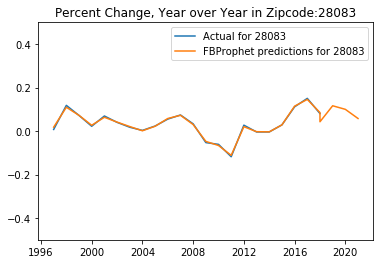

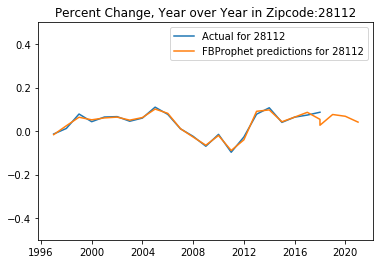

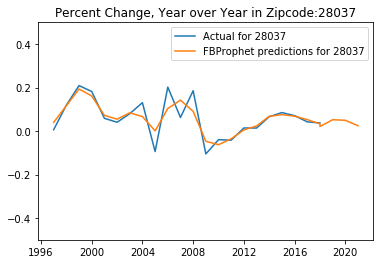

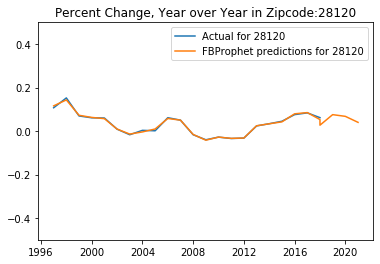

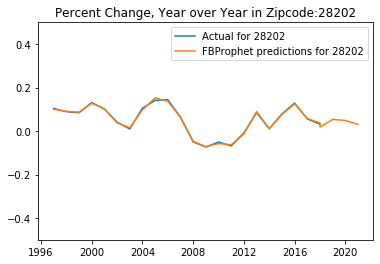

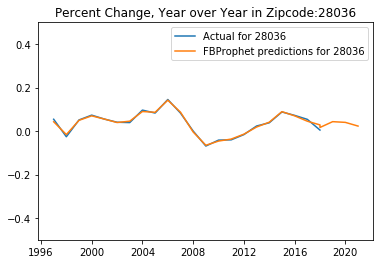

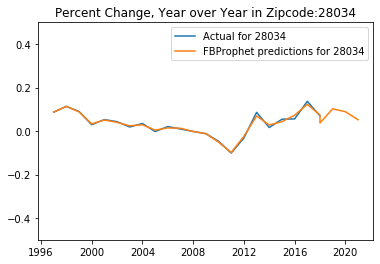

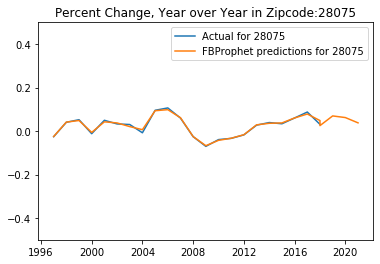

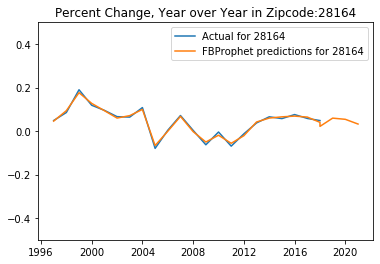

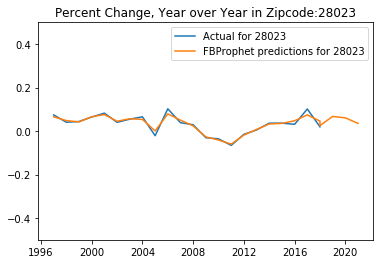

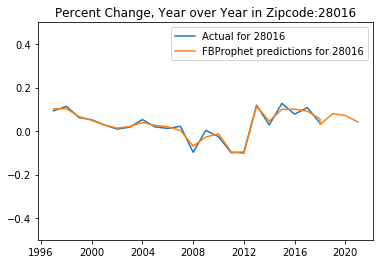

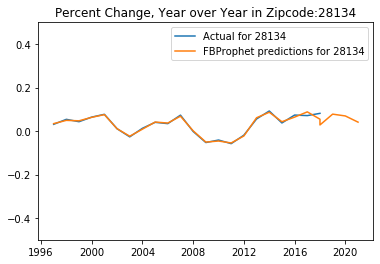

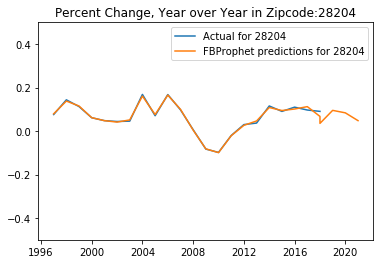

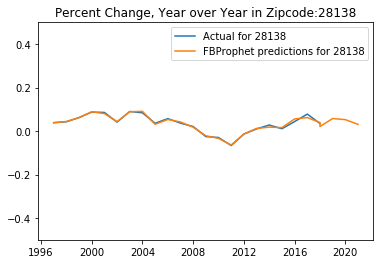

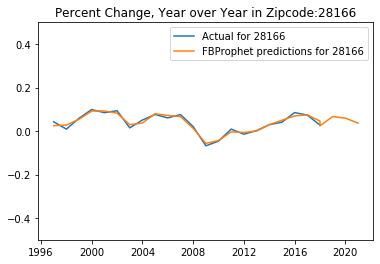

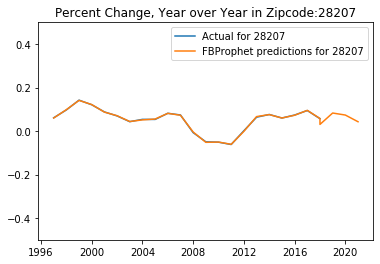

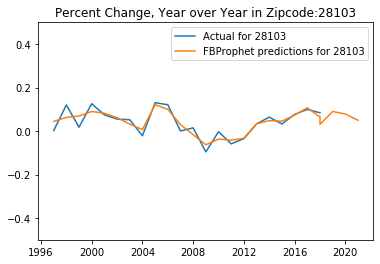

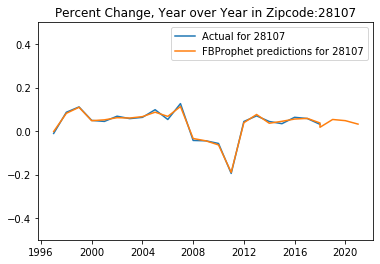

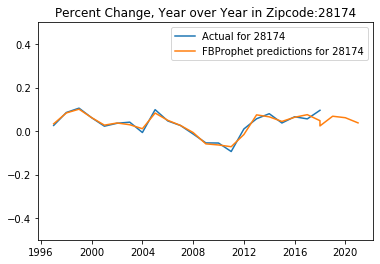

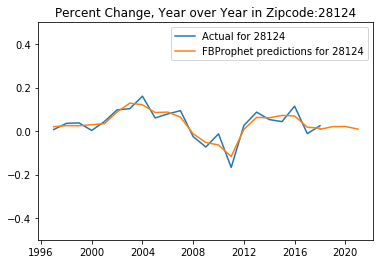

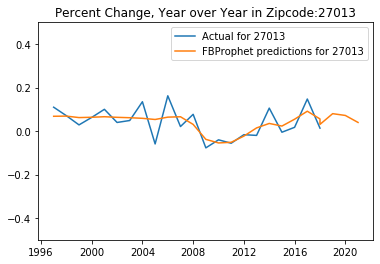

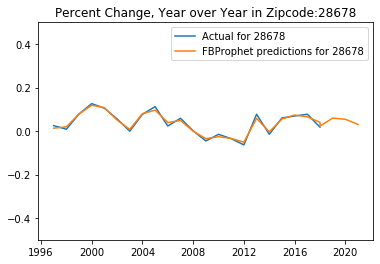

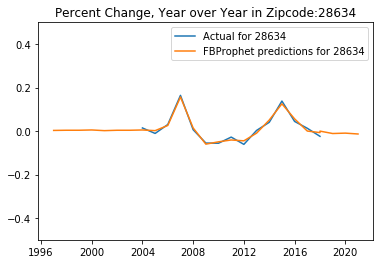

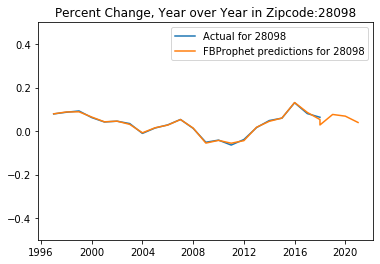

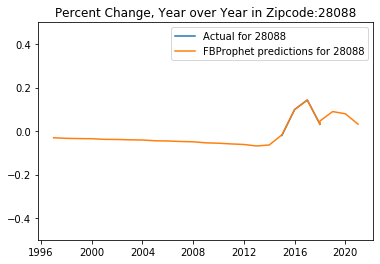

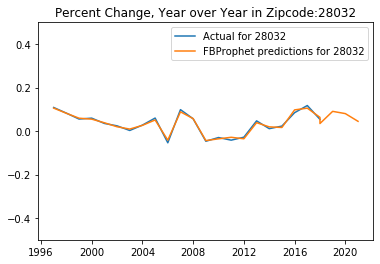

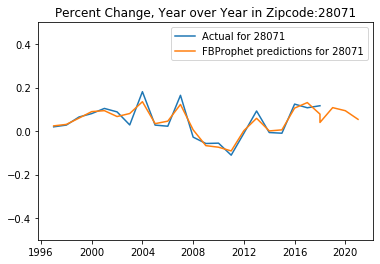

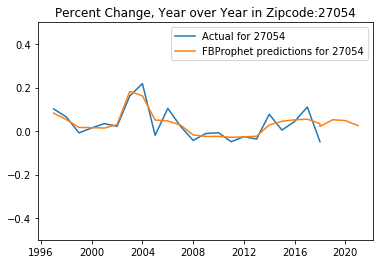

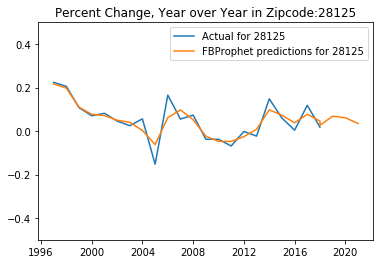

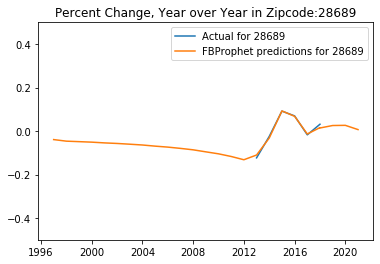

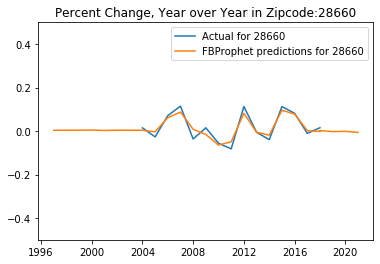

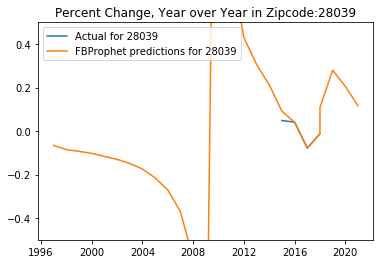

In [15]:
for zippy in zippies:
    
    plt.plot(metro_annual_pct.index, 
         metro_annual_pct[str(zippy)], 
         label=f'Actual for {zippy}')
    
    plt.plot(fb_pct_change.index, 
             fb_pct_change[zippy], 
             label=f'FBProphet predictions for {zippy}')

    plt.ylim(-0.5,0.5)
    plt.legend(loc='best')
    plt.title(f"Percent Change, Year over Year in Zipcode:{zippy}")
    
    plt.show()

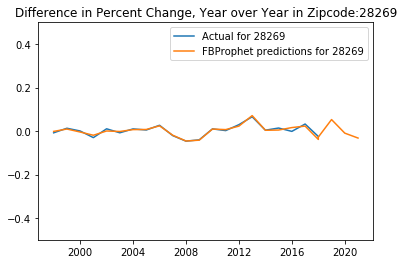

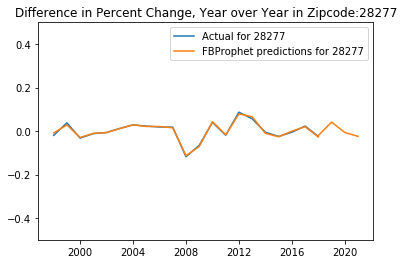

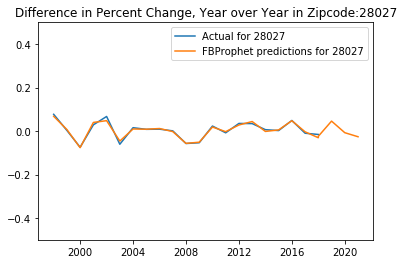

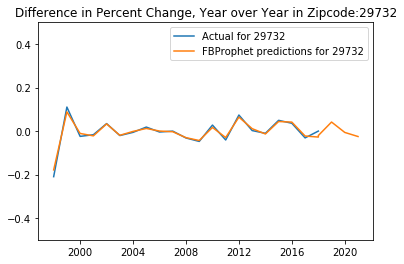

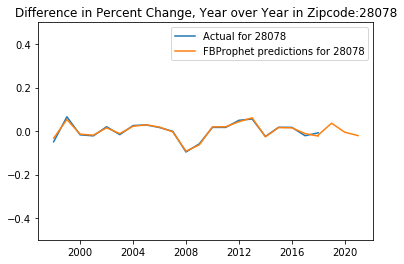

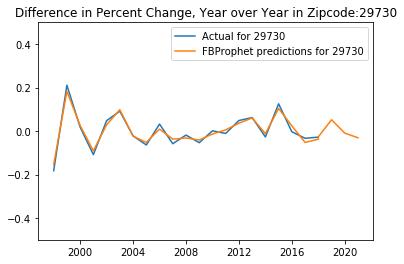

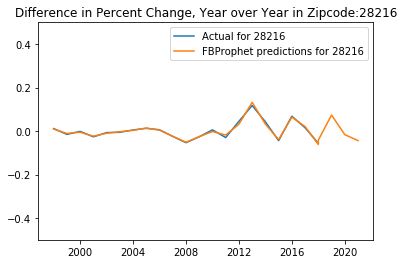

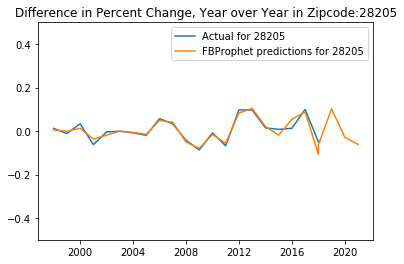

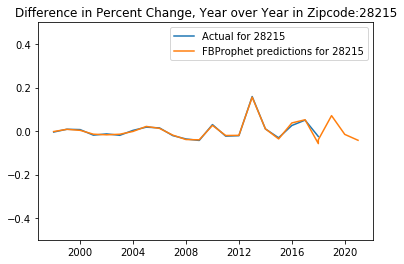

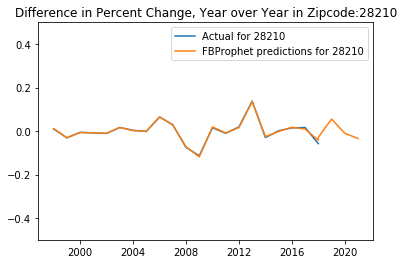

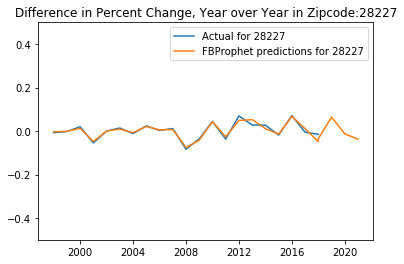

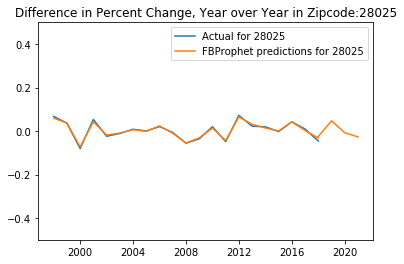

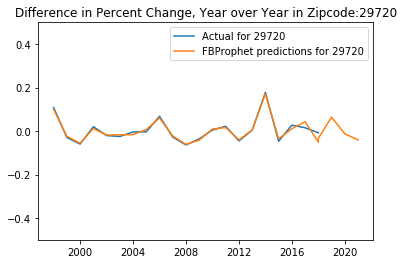

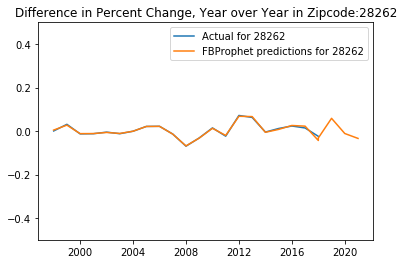

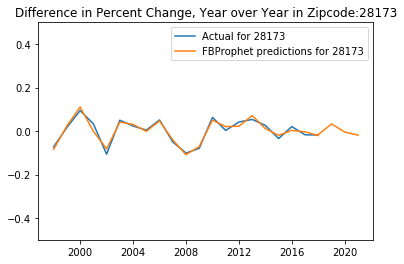

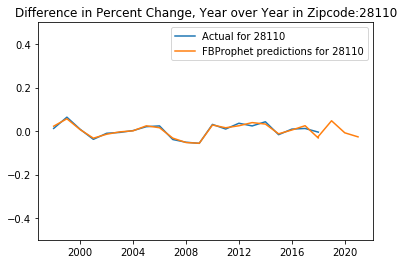

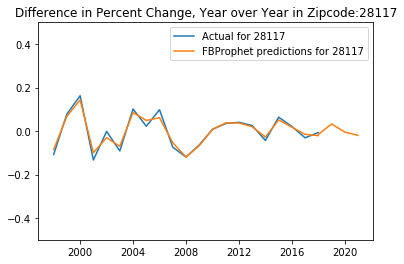

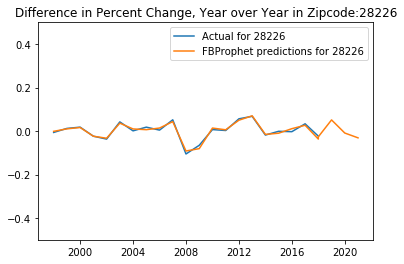

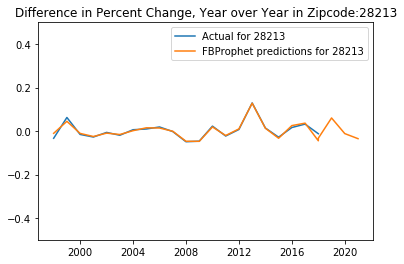

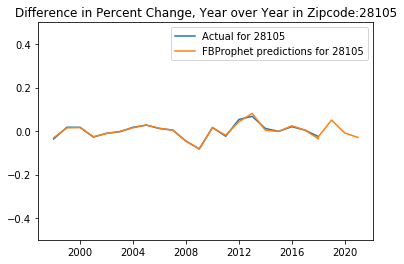

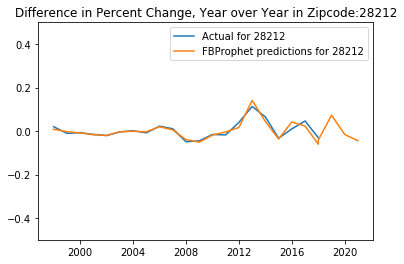

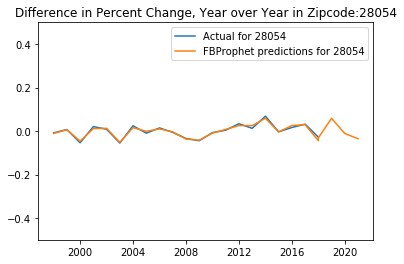

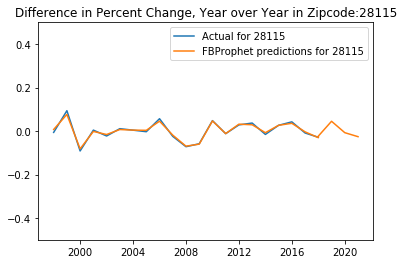

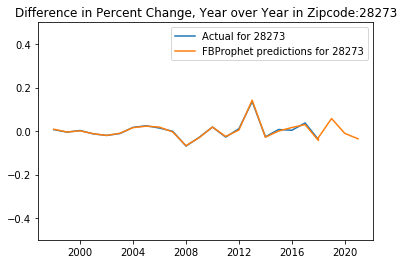

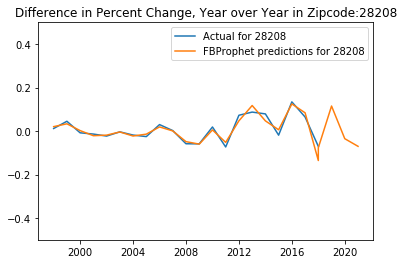

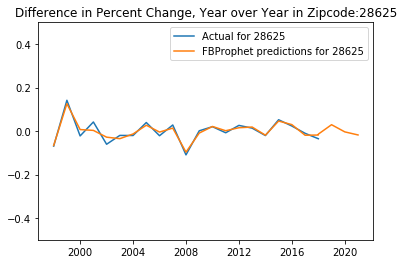

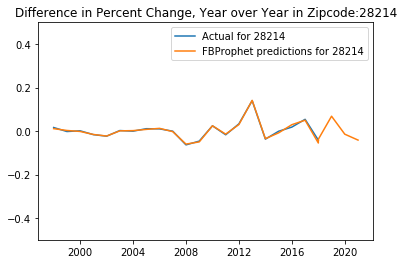

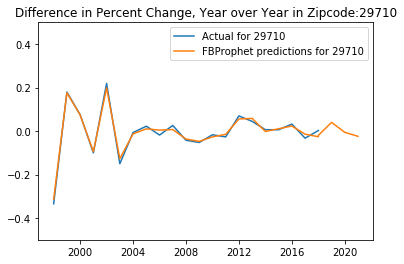

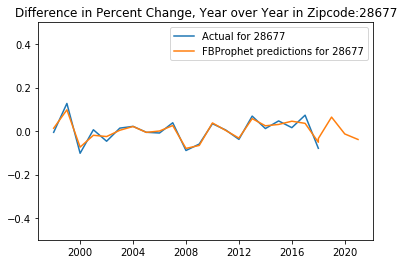

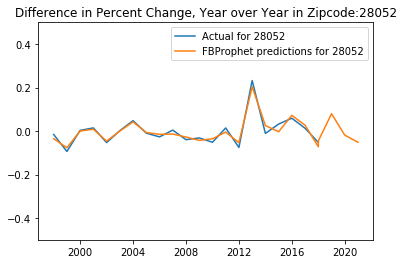

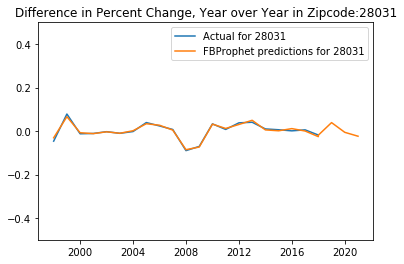

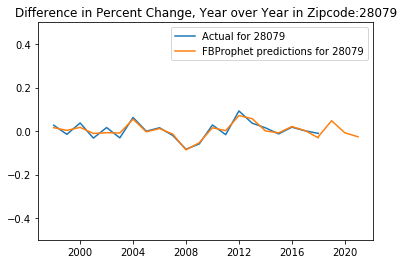

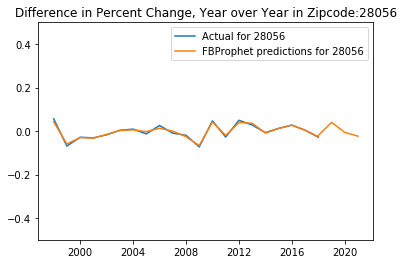

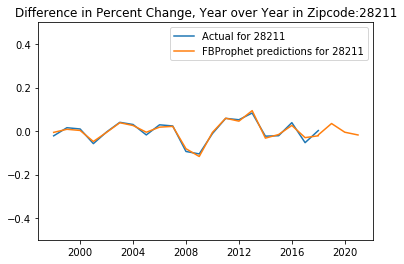

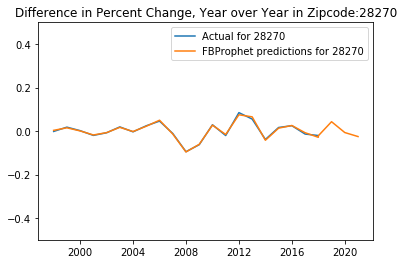

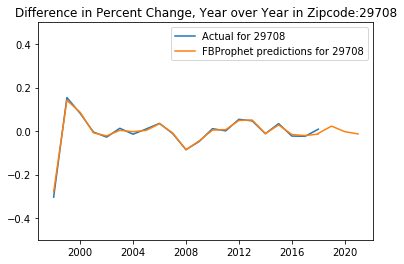

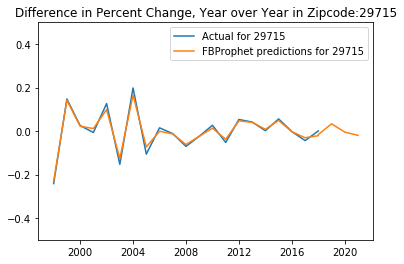

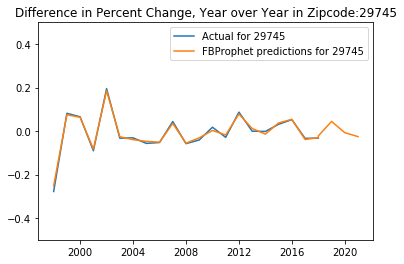

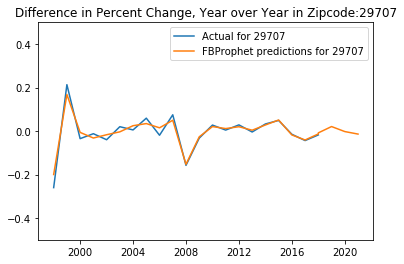

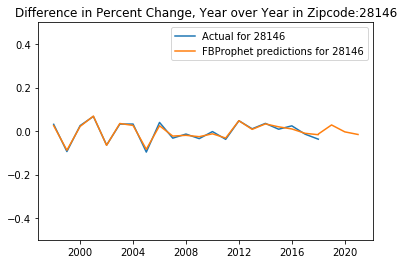

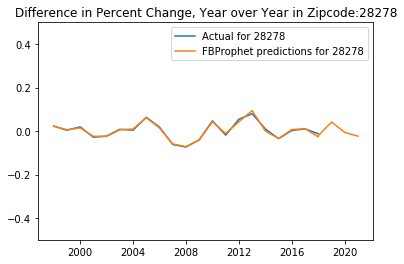

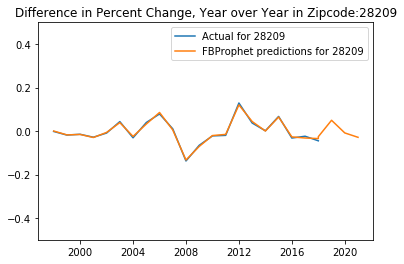

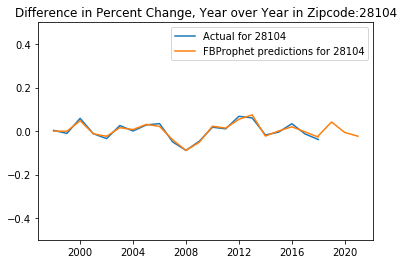

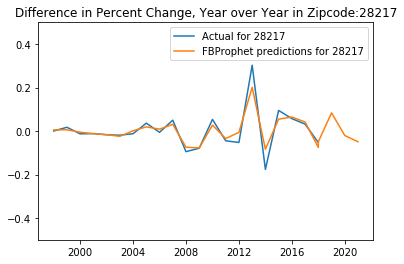

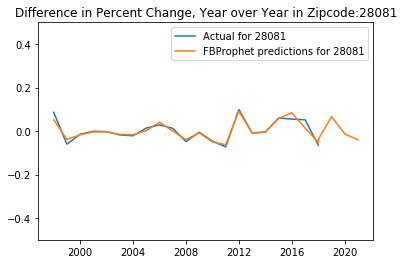

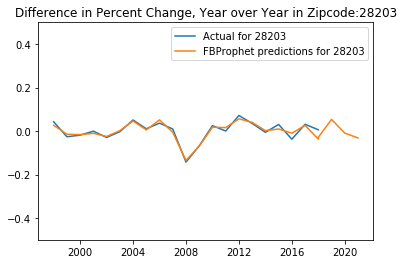

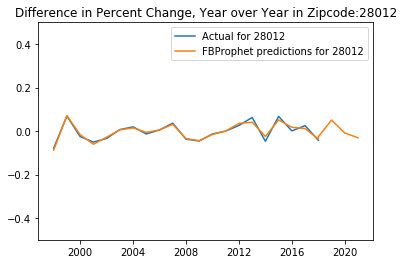

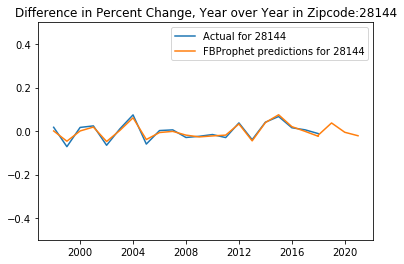

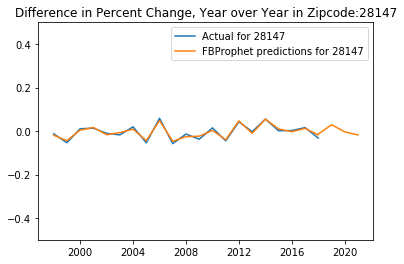

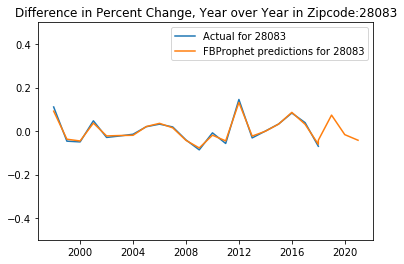

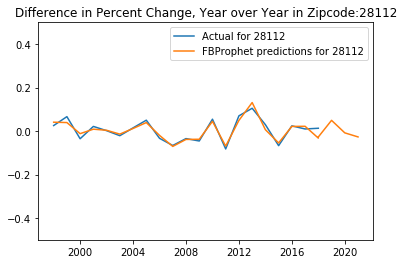

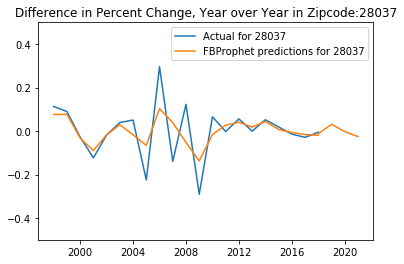

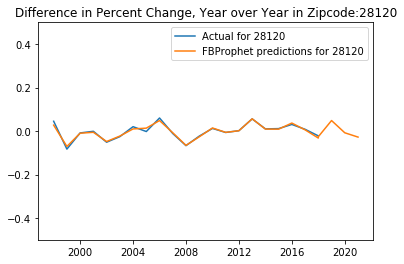

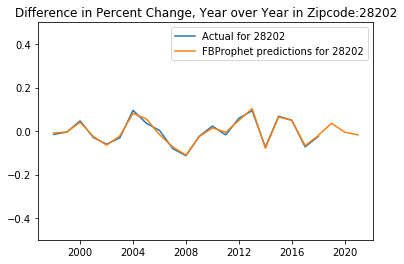

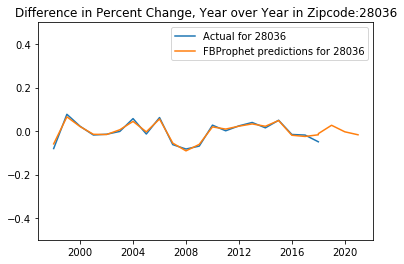

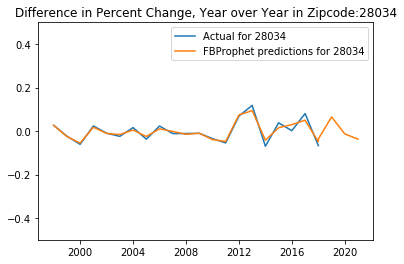

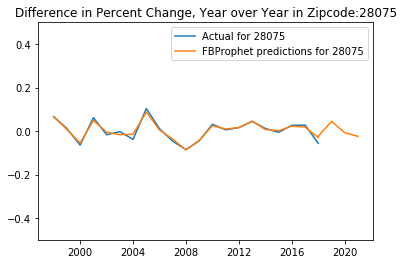

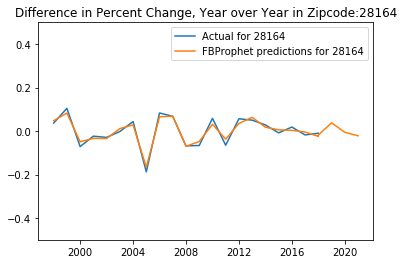

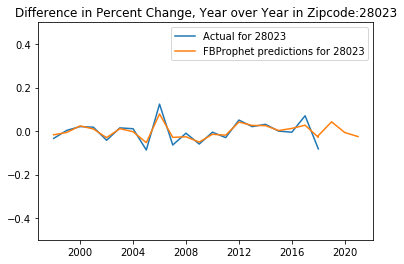

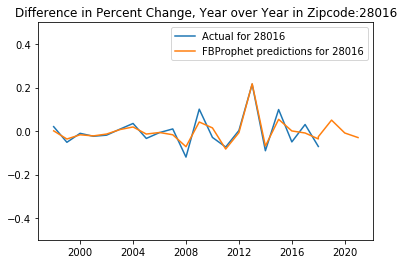

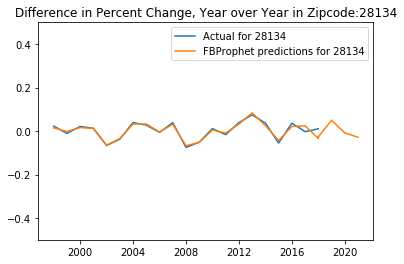

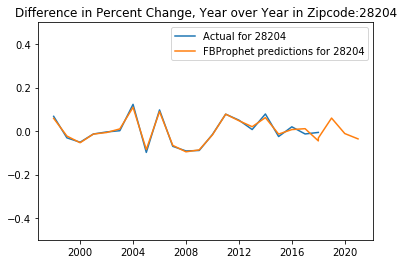

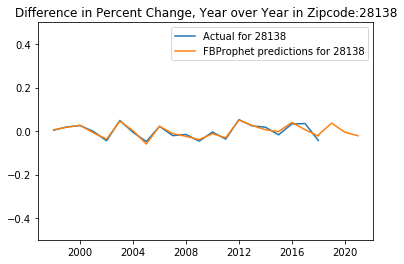

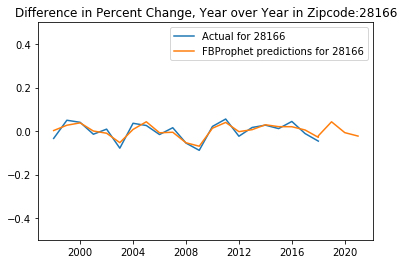

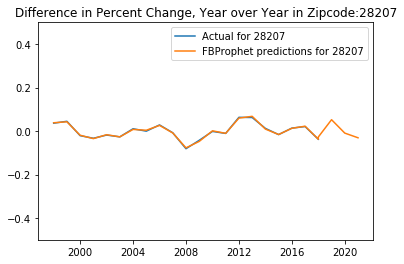

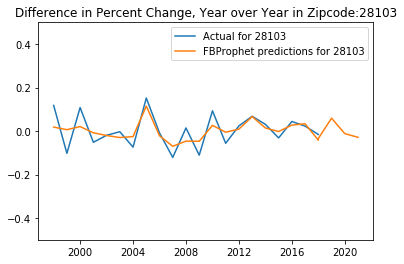

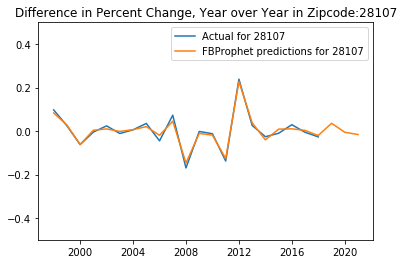

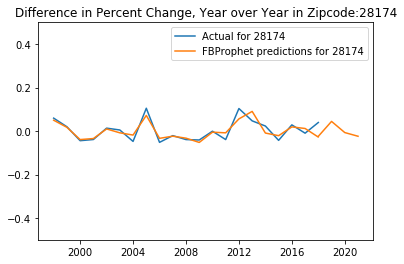

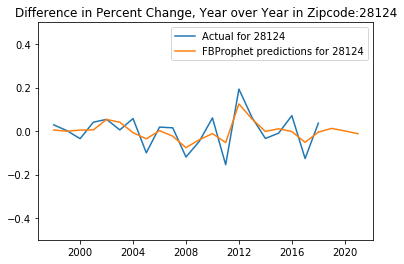

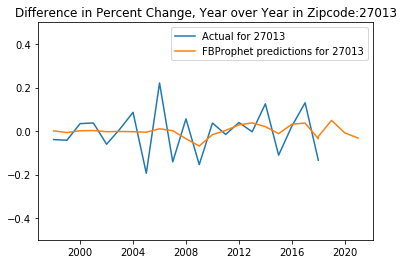

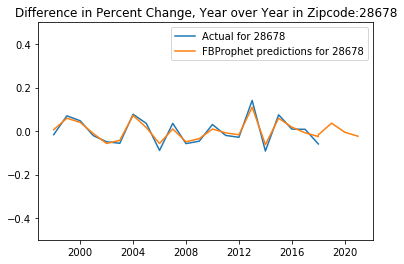

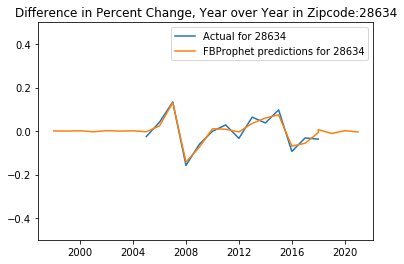

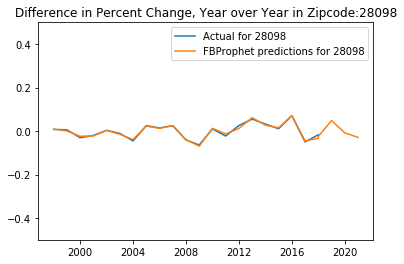

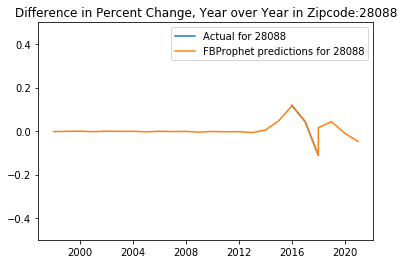

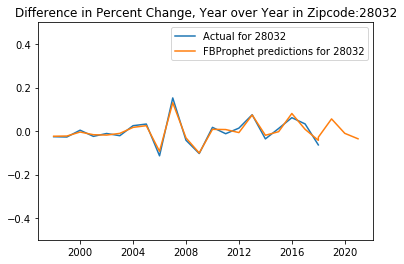

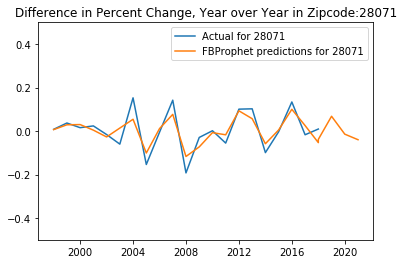

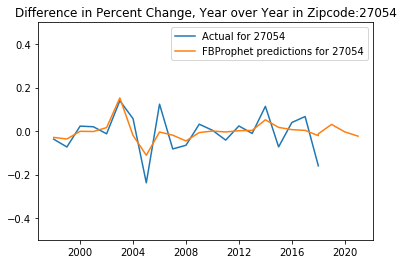

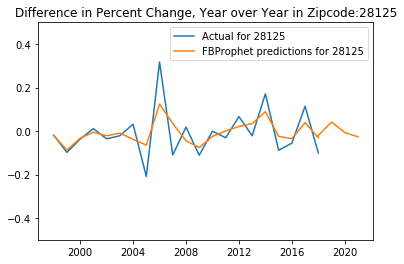

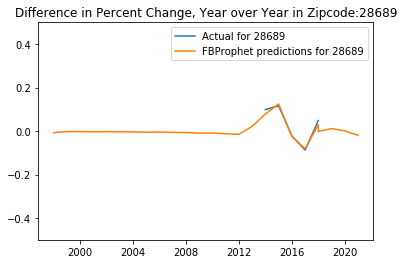

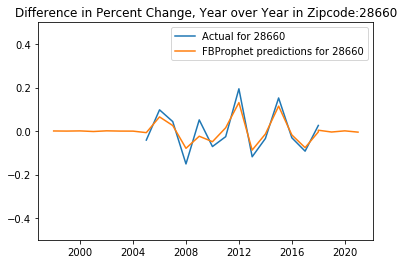

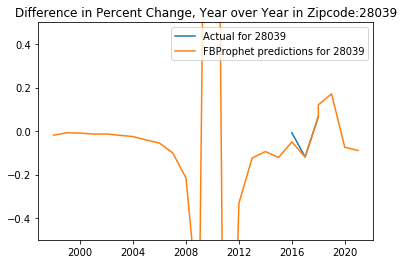

In [16]:
for zippy in zippies:
    
    plt.plot(metro_annual_pct_diff.index, 
         metro_annual_pct_diff[str(zippy)], 
         label=f'Actual for {zippy}')
    
    plt.plot(fb_ann.index, 
             fb_ann[zippy], 
             label=f'FBProphet predictions for {zippy}')

    plt.ylim(-0.5,0.5)
    plt.legend(loc='best')
    plt.title(f"Difference in Percent Change, Year over Year in Zipcode:{zippy}")
    
    plt.show()

In [23]:
metro_annual_pct_diff.tail(3).T.sort_values('2018-01-01', ascending=False)

Date_index  2016-01-01  2017-01-01  2018-01-01
28039        -0.007504   -0.119271    0.066301
28689        -0.022031   -0.087006    0.048731
28174         0.028554   -0.009682    0.039484
28124         0.071027   -0.126184    0.036255
28660        -0.030800   -0.092352    0.025863
...                ...         ...         ...
28023        -0.005305    0.070435   -0.082002
28125        -0.055675    0.114475   -0.101321
28088         0.119040    0.044007   -0.111654
27013         0.022638    0.130009   -0.133879
27054         0.039382    0.066861   -0.159797

[81 rows x 3 columns]